In [2]:
import pandas as pd
protein=pd.read_table('protein.txt',sep='\t')

In [3]:
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
print(protein.describe())

         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr&Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

In [5]:
print(protein.columns)

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')


In [6]:
print(protein.shape)

(25, 10)


In [7]:
from sklearn import preprocessing
#删除countrry,只保留序号用来识别case，其余都是特征值
sprotein=protein.drop(['Country'],axis=1)
#数据标准化处理
sprotein_scaled=preprocessing.scale(sprotein)
#查看处理结果
print(sprotein_scaled)

[[ 0.08294065 -1.79475017 -2.22458425 -1.1795703  -1.22503282  0.9348045
  -2.29596509  1.24796771 -1.37825141]
 [-0.28297397  1.68644628  1.24562107  0.40046785 -0.6551106  -0.39505069
  -0.42221774 -0.91079027  0.09278868]
 [ 1.11969872  0.38790475  1.06297868  0.05573225  0.06479116 -0.5252463
   0.88940541 -0.49959828 -0.07694671]
 [-0.6183957  -0.52383718 -1.22005113 -1.2657542  -0.92507375  2.27395937
  -1.98367386  0.32278572  0.03621022]
 [-0.03903089  0.96810416 -0.12419682 -0.6624669  -0.6851065   0.19082957
   0.45219769 -1.01358827 -0.07694671]
 [ 0.23540507  0.8023329   0.69769391  1.13303099  1.68457011 -0.96233157
   0.3272812  -1.21918427 -0.98220215]
 [-0.43543839  1.02336124  0.69769391 -0.86356267  0.33475432 -0.71124003
   1.38907137 -1.16778527 -0.30326057]
 [-0.10001666 -0.82775116 -0.21551801  2.38269753  0.45473794 -0.55314536
   0.51465594 -1.06498727 -1.5479868 ]
 [ 2.49187852  0.55367601  0.33240914  0.34301192  0.42474204 -0.385751
   0.3272812  -0.34540128 

In [8]:
#导入KMeans
from sklearn.cluster import KMeans

In [9]:
#K值的选择——比较高阶。这个和SPSS里面有个石头图之类的那个是不是一个原理？
NumberOfClusters=range(1,20)#左包含
kmeans=[KMeans(n_clusters=i) for i in NumberOfClusters]
score = [kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range (len(kmeans))]
score
#fit.score()的值：算的是Cal-Harabasz score，即类内稠密程度————协方差越小越好 和 类之间的离散程度——协方差越大越好，以评估聚类效果。根据优化的程度选择。本次选择K=5，再细分效果增强没那么明显了。

[-225.00000000000003,
 -139.5073704483181,
 -110.40242709032154,
 -90.41954159596905,
 -75.85361543875908,
 -63.946227705848216,
 -53.790578563056116,
 -47.06795284071728,
 -40.75894618482312,
 -34.908933374422716,
 -30.429164116494334,
 -28.07282432022794,
 -22.987026332639406,
 -19.914623399163656,
 -16.65954131634659,
 -13.597310337368167,
 -11.14746922210383,
 -8.54546038166568,
 -6.7041060086011095]

<function matplotlib.pyplot.show(*args, **kw)>

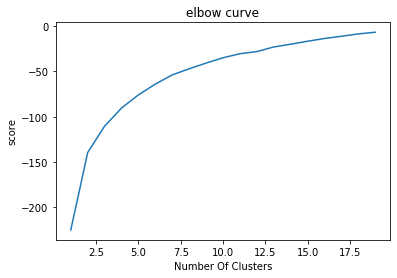

In [10]:
#上面的结果可视化一下
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfClusters,score)
plt.xlabel('Number Of Clusters')
plt.ylabel('score')
plt.title('elbow curve')
plt.show

In [13]:
#设置超级参数
myKmeans=KMeans(algorithm="auto",n_clusters=5,n_init=10,max_iter=200)
#n_clusters聚类中心数
#n_init和max_iter：初始值的选择次数及最大迭代次数
#algorithm：对于稀疏数据用full（EM算法），非稀疏数据用elkan算法

In [14]:
#algorithm值——init参数的取值可以为：
#1）k-means++算法（默认）：选择彼此距离尽可能远的K个点
#2）随机：random
#3)通过数组指定：ndarray

In [15]:
#模型训练/拟合
myKmeans.fit(sprotein_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#预测聚类结果
y_kmeans=myKmeans.predict(sprotein)
print(y_kmeans)

[1 4 4 1 4 4 4 2 4 1 1 4 1 4 4 4 3 1 3 4 4 4 1 4 1]


In [26]:
def print_kmcluster(k):
    for i in range (k):
        print('聚类',i)
        ls = []
        for index,value in enumerate(y_kmeans):
            if i == value:
                ls.append(index)
        print(protein.loc[ls,['Country','RedMeat','Fish','Fr&Veg']])

print_kmcluster(5)

聚类 0
Empty DataFrame
Columns: [Country, RedMeat, Fish, Fr&Veg]
Index: []
聚类 1
       Country  RedMeat  Fish  Fr&Veg
0      Albania     10.1   0.2     1.7
3     Bulgaria      7.8   1.2     4.2
9       Greece     10.2   5.9     6.5
10     Hungary      5.3   0.3     4.2
12       Italy      9.0   3.4     6.7
17     Romania      6.2   1.0     2.8
22        USSR      9.3   3.0     2.9
24  Yugoslavia      4.4   0.6     3.2
聚类 2
   Country  RedMeat  Fish  Fr&Veg
7  Finland      9.5   5.8     1.4
聚类 3
     Country  RedMeat  Fish  Fr&Veg
16  Portugal      6.2  14.2     7.9
18     Spain      7.1   7.0     7.2
聚类 4
           Country  RedMeat  Fish  Fr&Veg
1          Austria      8.9   2.1     4.3
2          Belgium     13.5   4.5     4.0
4   Czechoslovakia      9.7   2.0     4.0
5          Denmark     10.6   9.9     2.4
6        E Germany      8.4   5.4     3.6
8           France     18.0   5.7     6.5
11         Ireland     13.9   2.2     2.9
13     Netherlands      9.5   2.5     3.7
14         